In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
metro_interstate_traffic_volume = fetch_ucirepo(id=492) 
  
# data (as pandas dataframes) 
X = metro_interstate_traffic_volume.data.features 
y = metro_interstate_traffic_volume.data.targets 

In [3]:
df = X.merge(y, on=X.index).drop(columns=['key_0'])
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## EDA - Explaratory Data Analysis

In [4]:
# full documentation link is => https://github.com/uci-ml-repo/ucimlrepo
df_info = metro_interstate_traffic_volume.variables
df_info

,name,role,type,demographic,description,units,missing_values
0,holiday,Feature,Categorical,None,"US National holidays plus regional holiday, Mi...",None,no
1,temp,Feature,Continuous,None,Average temp in kelvin,Kelvin,no
2,rain_1h,Feature,Continuous,None,Amount in mm of rain that occurred in the hour,mm,no
3,snow_1h,Feature,Continuous,None,Amount in mm of snow that occurred in the hour,mm,no
4,clouds_all,Feature,Integer,None,Percentage of cloud cover,%,no
5,weather_main,Feature,Categorical,None,Short textual description of the current weather,None,no
6,weather_description,Feature,Categorical,None,Longer textual description of the current weather,None,no
7,date_time,Feature,Date,None,Hour of the data collected in local CST time,None,no
8,traffic_volume,Target,Integer,None,Hourly I-94 ATR 301 reported westbound traffic...,None,no


In [5]:
metro_interstate_traffic_volume.metadata.abstract

'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
df.shape

(48204, 9)

In [8]:
(df.isnull().sum()/len(df)*100).round(2)

holiday                99.87
temp                    0.00
rain_1h                 0.00
snow_1h                 0.00
clouds_all              0.00
weather_main            0.00
weather_description     0.00
date_time               0.00
traffic_volume          0.00
dtype: float64

About 99.87 % of the values are null in holiday column

In [9]:
((df == 0).mean()*100).round(2) # shows zero value % in each column

holiday                 0.00
temp                    0.02
rain_1h                92.81
snow_1h                99.87
clouds_all              4.12
weather_main            0.00
weather_description     0.00
date_time               0.00
traffic_volume          0.00
dtype: float64

1. In rain_1h column, **92.81%** of the values are zero
2. In snow_1h column, **99.87%** of the values are zero
3. In clouds_all column, **4.12%** of the values are zero
4. In temp column only **0.02%** of the values are zero

In [10]:
df[df['temp']==0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11898,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
11899,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
11900,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
11901,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
11946,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
11947,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
11948,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
11949,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
11950,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
11951,NaN,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


In here, the temp is in Kelvin and there are some zeros, but they are very strange, because if we convert them into Celcius, the temp is -273.15 Celcius degree, but it is wrong, we have to deal with it

In [11]:
# let's check the duplicate values
duplicates = df.duplicated().sum()
print(f"The number of duplicates: {duplicates}")

The number of duplicates: 17


#### Unique values in each categorical feature

In [12]:
df.holiday.value_counts()

holiday
Labor Day                    7
Christmas Day                6
Thanksgiving Day             6
Martin Luther King Jr Day    6
New Years Day                6
Veterans Day                 5
Columbus Day                 5
Memorial Day                 5
Washingtons Birthday         5
State Fair                   5
Independence Day             5
Name: count, dtype: int64

In [13]:
df.weather_main.value_counts()

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [14]:
df.weather_description.value_counts()

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

If we look at the dataset, we can see that 'sky is clear' and 'Sky is Clear' has been counted two times, because they are different in different case. so we have to convert everything into lower case

In [15]:
# Group by 'weather_main' and 'weather_description', then count occurrences
counts = df.groupby(['weather_main', 'weather_description']).size().reset_index(name='count')
counts = counts.sort_values(['weather_main', 'count'], ascending=[True, False])
counts

,weather_main,weather_description,count
1,Clear,sky is clear,11665
0,Clear,Sky is Clear,1726
4,Clouds,overcast clouds,5081
2,Clouds,broken clouds,4666
5,Clouds,scattered clouds,3461
3,Clouds,few clouds,1956
8,Drizzle,light intensity drizzle,1100
6,Drizzle,drizzle,651
7,Drizzle,heavy intensity drizzle,64
9,Drizzle,shower drizzle,6


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


#### Data Cleaning and Creating New Columns

In [17]:
# first drop duplicates
df.drop_duplicates(inplace=True)

In [18]:
index_num = df[df['temp']==0].index # drop records where Kelvin is 0
df = df.drop(index=index_num)

In [19]:
df.shape

(48177, 9)

In [20]:
# Define proper day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January','February','March','April','May','June','July', 'August', 'September','October', 'November','December']

# first let's change the data types of date column and create a new cols
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['month_name'] = pd.Categorical(
    df['date_time'].dt.month_name(),
    categories=month_order,
    ordered=True
)
df['day_of_week'] = df['date_time'].dt.dayofweek
df['week_name'] = pd.Categorical(
    df['date_time'].dt.day_name(), 
    categories=day_order, 
    ordered=True
)
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['hour'] = df['date_time'].dt.hour

In [21]:
# convert weather_description column into lower case 
df['weather_description'] = df['weather_description'].str.lower()
# create temp column with celcius degree, because here the temperature is shown in Kelvin, for simplicity we create a new col with Celcius
df['temp_c'] = (df['temp'] - 273.15).round(1)
# fill NaN with No Holiday in holiday column
df['holiday'] = df['holiday'].fillna('No Holiday')

In [22]:
# we use temp_c column that is measured in celcius, so no need for Kelvin, so drop temp
df = df.drop(columns='temp')

In [23]:
# clouds_all column is in %, let'e divide it into 100 to get the numeric value, not in percentage, because when it comes to preprocessing
# there will  be no need to scale it
df['clouds_all'] = df['clouds_all']/100

In [24]:
df.sample(5)

,holiday,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,month_name,day_of_week,week_name,is_weekend,hour,temp_c
11428,No Holiday,0.00,0.0,0.64,Clouds,broken clouds,2014-01-13 10:00:00,4045,2014,1,January,0,Monday,0,10,-2.4
4178,No Holiday,0.00,0.0,0.40,Haze,haze,2013-03-09 14:00:00,4776,2013,3,March,5,Saturday,1,14,3.0
1971,No Holiday,0.00,0.0,0.90,Clouds,overcast clouds,2012-12-13 10:00:00,4531,2012,12,December,3,Thursday,0,10,-1.8
37737,No Holiday,0.00,0.0,0.01,Clear,sky is clear,2017-10-05 00:00:00,529,2017,10,October,3,Thursday,0,0,6.9
22795,No Holiday,0.25,0.0,0.90,Rain,heavy intensity rain,2016-04-25 11:00:00,4510,2016,4,April,0,Monday,0,11,10.6


#### Let's do analysis by creating visualizations

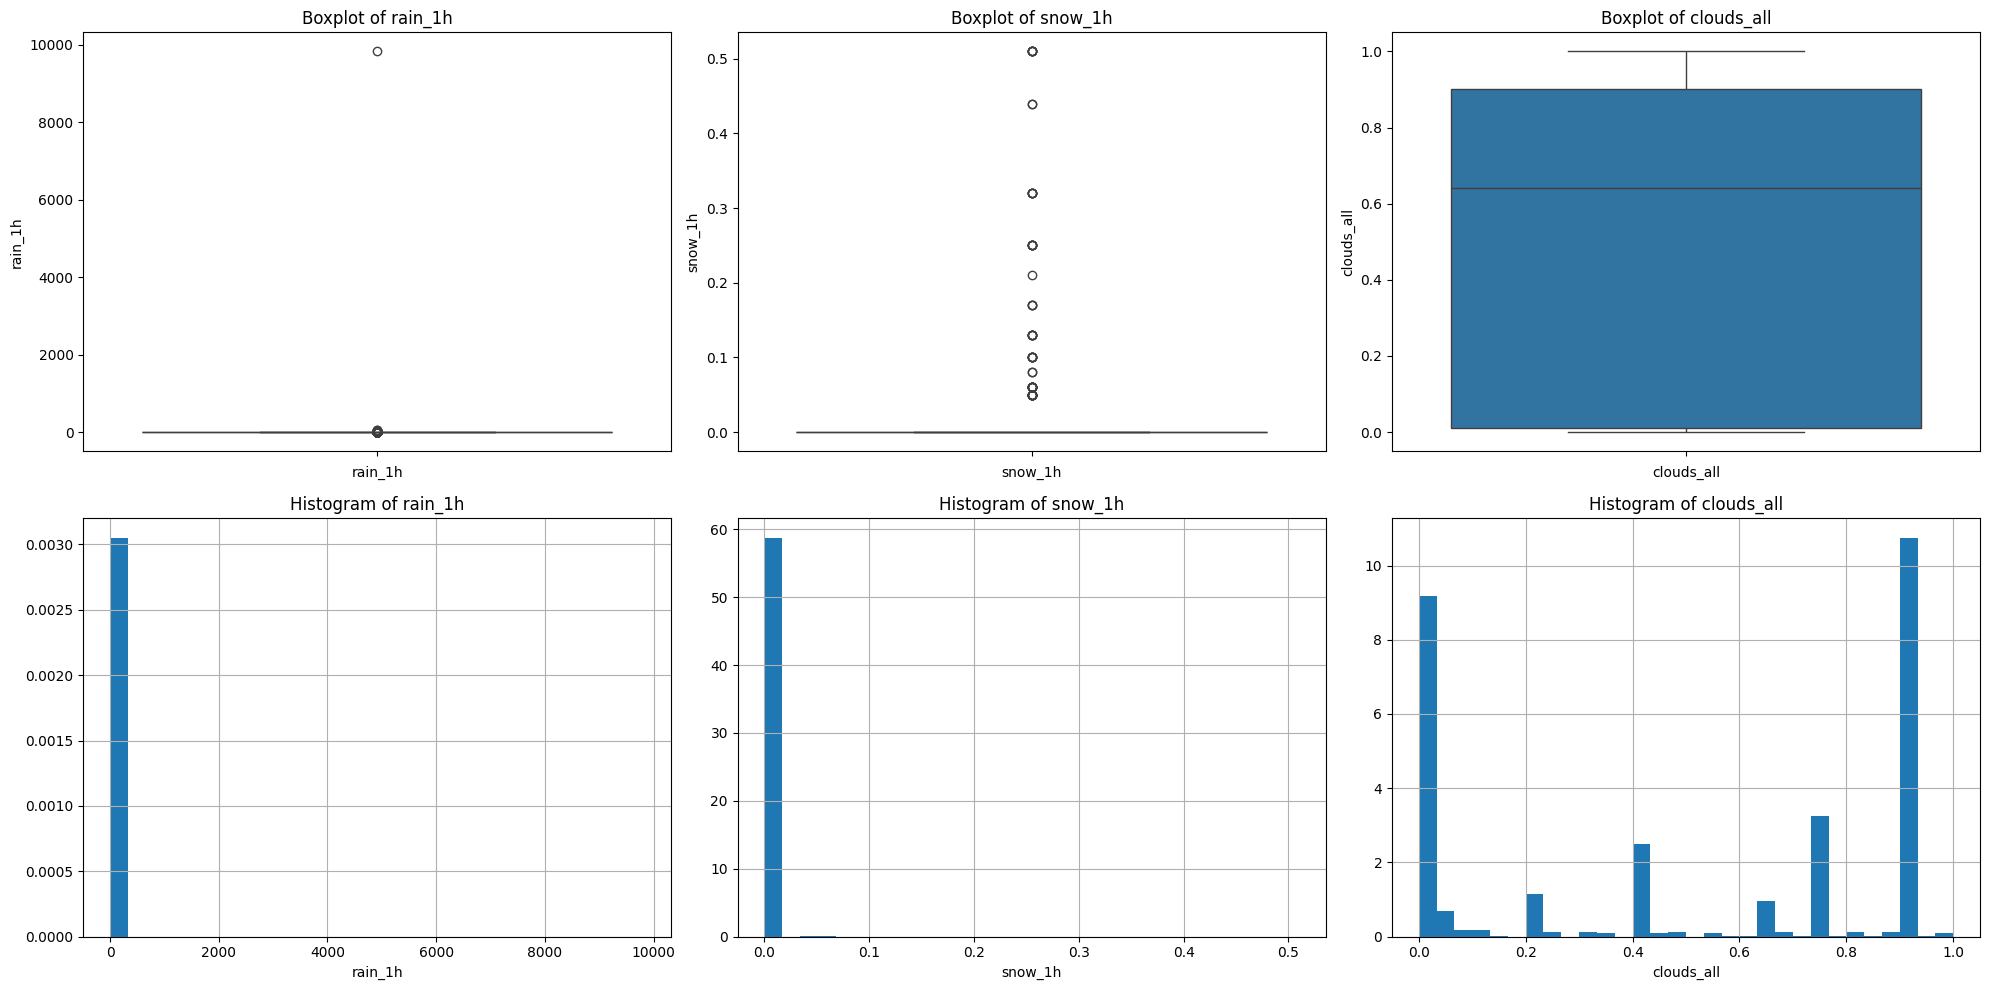

In [25]:
# first let's see the numerical values and their distribution
numeric_features = ['rain_1h', 'snow_1h', 'clouds_all']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes = axes.flatten()
# Boxplots for the first row (outliers and spread)
for i, feature in enumerate(numeric_features):
    sns.boxplot(df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)

# Histograms using df.hist for the second row (distributions)
for i, feature in enumerate(numeric_features):
    df[feature].hist(ax=axes[i + 3], bins=30, density=True)  # bins for granularity; density for normalized dist
    axes[i + 3].set_title(f'Histogram of {feature}')
    axes[i + 3].set_xlabel(feature)

plt.tight_layout()  

plt.show()

In [26]:
print(f"Number of cols where rain between 0 and 100 mm per hour: {df[(df['rain_1h']>0) & (df['rain_1h']<100)].shape[0]}")
print(f"Number of cols where rain more than 100 mm per hour: {df[df['rain_1h']>100].shape[0]}")
print(f"Total number of non-zero values in snow_1h column: {df[df['snow_1h']>0].shape[0]}")

Number of cols where rain between 0 and 100 mm per hour: 3466
Number of cols where rain more than 100 mm per hour: 1
Total number of non-zero values in snow_1h column: 63


We have outliers in rain_1h and snow_1h columns. we have only *1* outlier in rain column, we can remove it, because it is only one and can effect the model negatively. But when it comes to snow, there are many outliers, as *99.87%* of the values are zero in this column, if we remove this info, we may remove important info, if we have many non-zero values, we could remove them. But in this case, we keep them.

In [27]:
# remove outlier
index_col = df[df['rain_1h']>100].index
df = df.drop(index=index_col)

#### Here we display categorical features count, first one is Weather Types in general, then each weather description by weather type

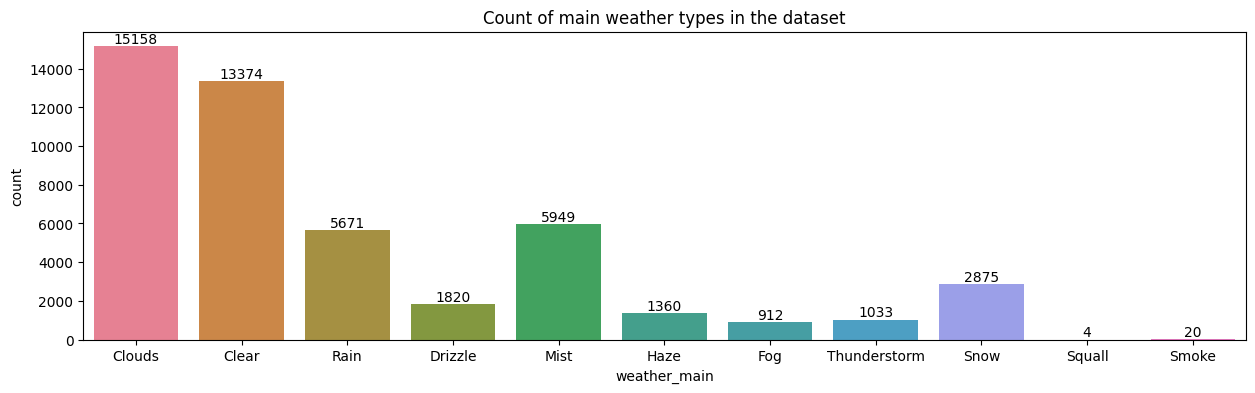

In [28]:
plt.figure(figsize=(15,4))
gr = sns.countplot(data=df, x=df['weather_main'], hue='weather_main')
for k in range(len(df['weather_main'].unique())):
    gr.bar_label(gr.containers[k])
plt.title("Count of main weather types in the dataset")
plt.show()

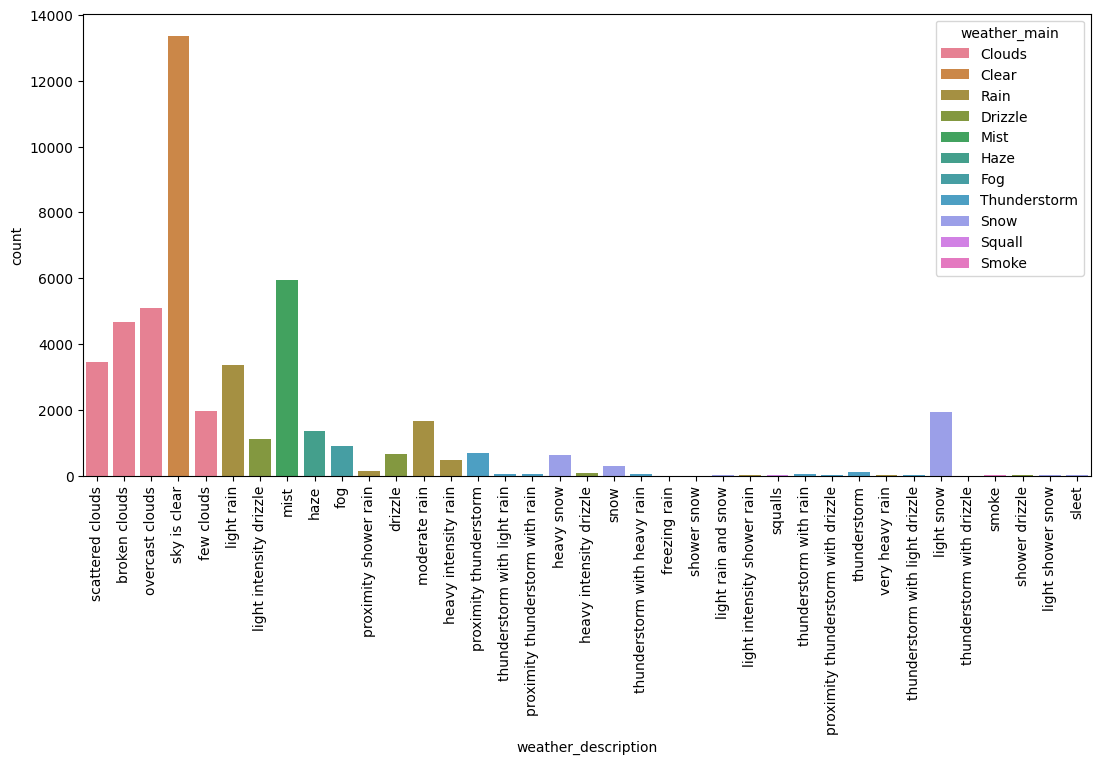

In [29]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='weather_description', hue='weather_main')
plt.xticks(rotation=90)
plt.show()

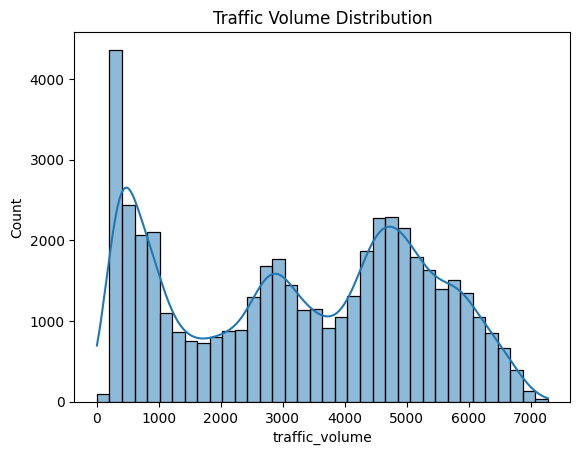

In [30]:
# now let's see the distribution of target column (traffic volume)
sns.histplot(df['traffic_volume'], kde=True)
plt.title("Traffic Volume Distribution")
plt.show()

The distribution does not follow normal distribution, but in fact it is a multi-modal distibution. It flactuates

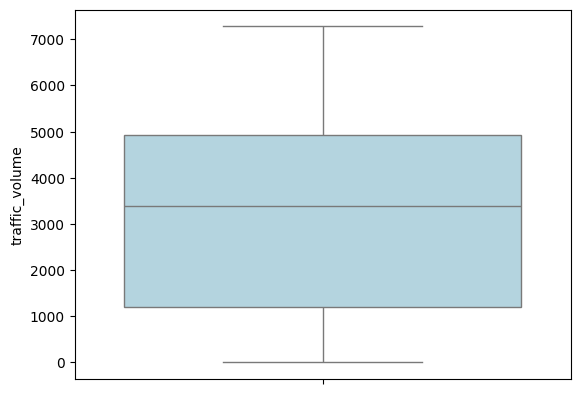

In [31]:
sns.boxplot(df['traffic_volume'], color='lightblue')
plt.show()

#### Bivariate and Multivariate Analysis

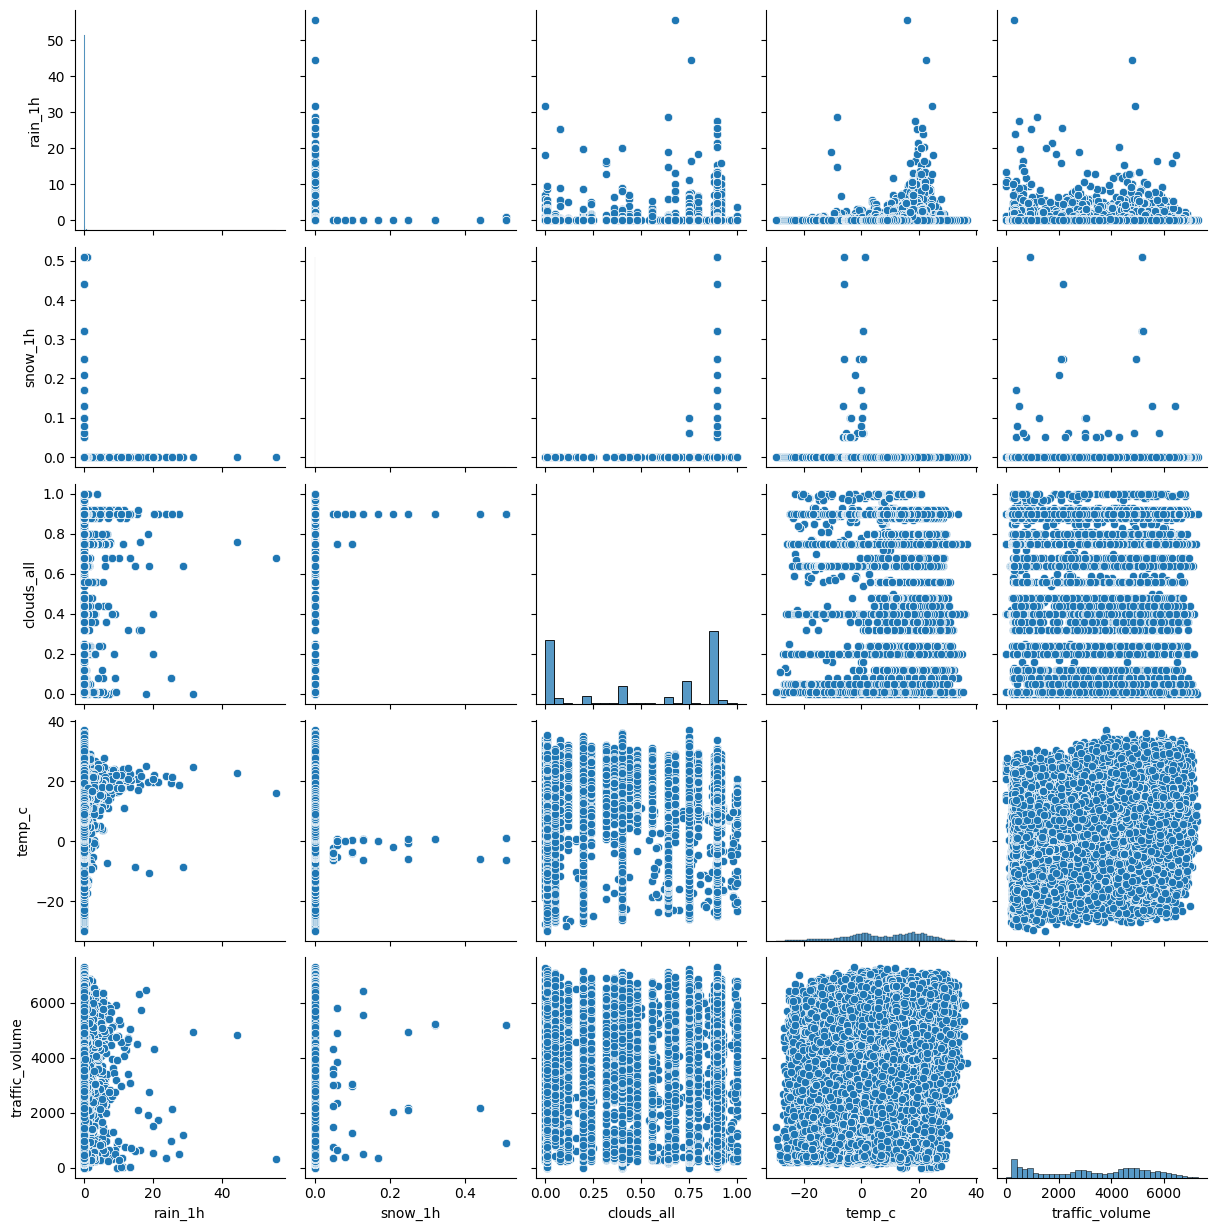

In [32]:
sns.pairplot(df[['rain_1h', 'snow_1h','clouds_all', 'temp_c', 'traffic_volume']])
plt.show()

We can see from the scatterplots from the above that there is no linear relationship.

In [33]:
pd.pivot_table(df, values=['temp_c', 'rain_1h', 'snow_1h', 'clouds_all'], index='weather_main').round(3)

,clouds_all,rain_1h,snow_1h,temp_c
weather_main,,,,
Clear,0.015,0.000,0.000,8.553
Clouds,0.641,0.000,0.000,8.316
Drizzle,0.823,0.158,0.000,10.651
Fog,0.515,0.087,0.001,6.270
Haze,0.587,0.047,0.000,2.670
Mist,0.660,0.238,0.001,6.330
Rain,0.726,0.548,0.000,13.830
Smoke,0.534,0.527,0.000,17.775
Snow,0.815,0.025,0.002,-5.192


Here we see the importance of weather type in each feature.

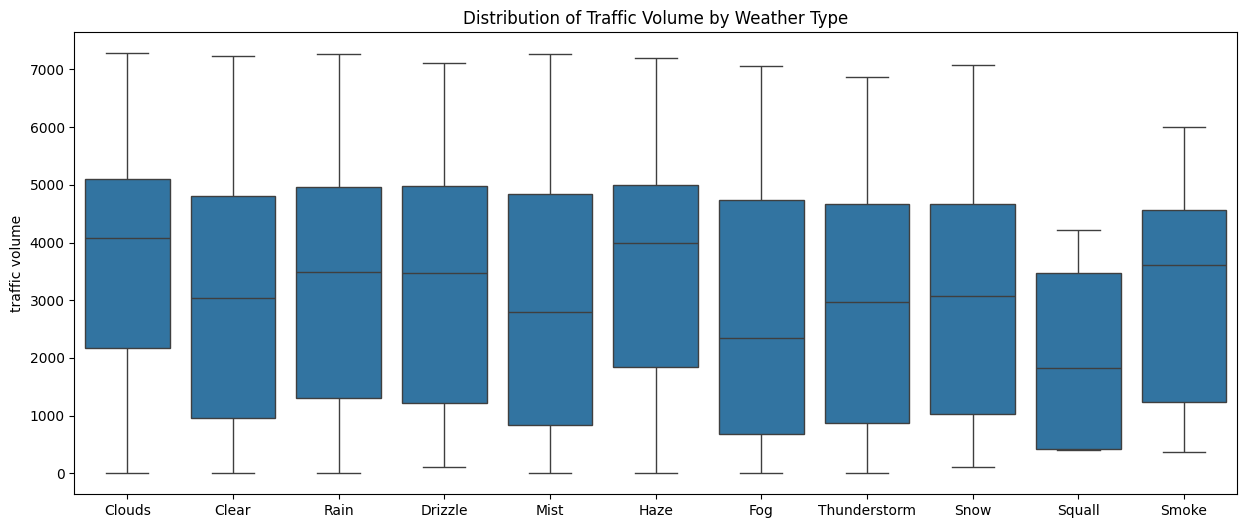

In [34]:
plt.figure(figsize=(15,6))
sns.boxplot(x='weather_main', y='traffic_volume', data=df)
plt.title("Distribution of Traffic Volume by Weather Type")
plt.xlabel('')
plt.ylabel('traffic volume')
plt.show()

Here we can see statistical values. The central rectangle shows middle 50% of the data. The bottom edge of the box indicates the first quartile (Q1), meaning 25% of the data falls below this value. The top edge of the box represents the third quartile (Q3), meaning 75% of the data falls below this value. 1.5 times the IQR from Q1 and Q3, respectively shows the outliers

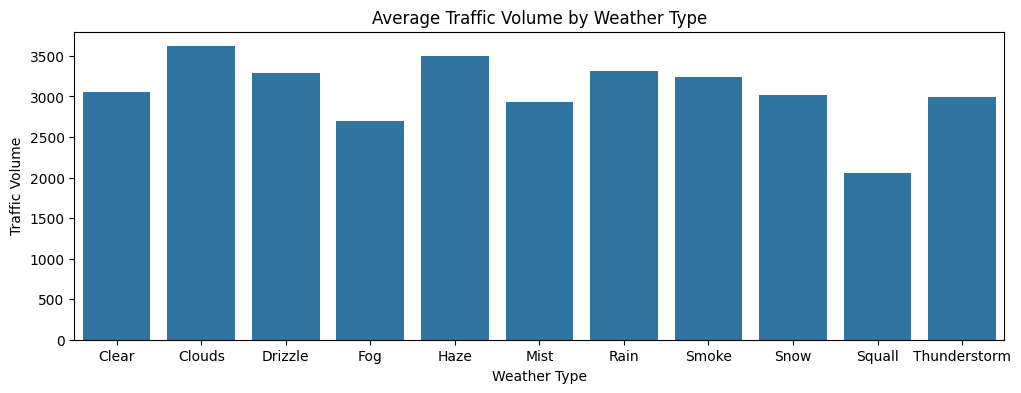

In [35]:
# Sometimes it can be a bit overwhelming to understand boxplot, so here is the barplot for average traffic volume by weather type
traffic_weather = df.groupby(['weather_main'])['traffic_volume'].mean().round(2)
traffic_weather = traffic_weather.reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data=traffic_weather, x='weather_main', y='traffic_volume')
plt.title("Average Traffic Volume by Weather Type")
plt.xlabel("Weather Type")
plt.ylabel("Traffic Volume")
plt.show()

In cloud and haze weather type, there will be most traffic, but in squall weather type, there will be the least traffic volume

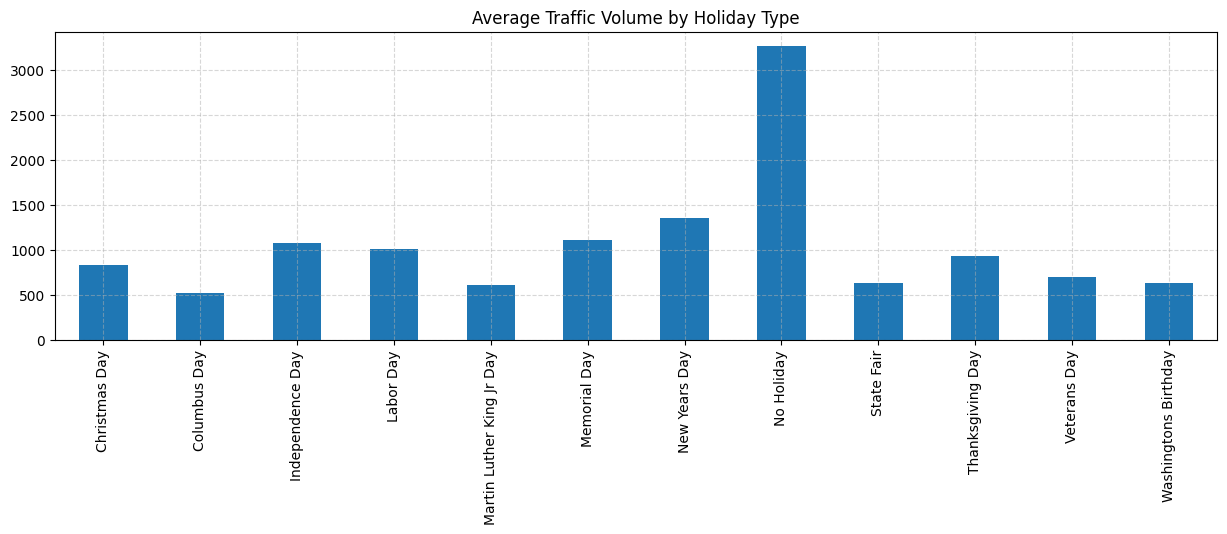

In [36]:
df.groupby('holiday')['traffic_volume'].mean().plot(kind='bar', figsize=(15,4))
plt.title("Average Traffic Volume by Holiday Type")
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('')
plt.show()

We have so many NaN values in holiday column, so the traffic volume is so high. In holiday column, we have very few cols. for actual holidays names

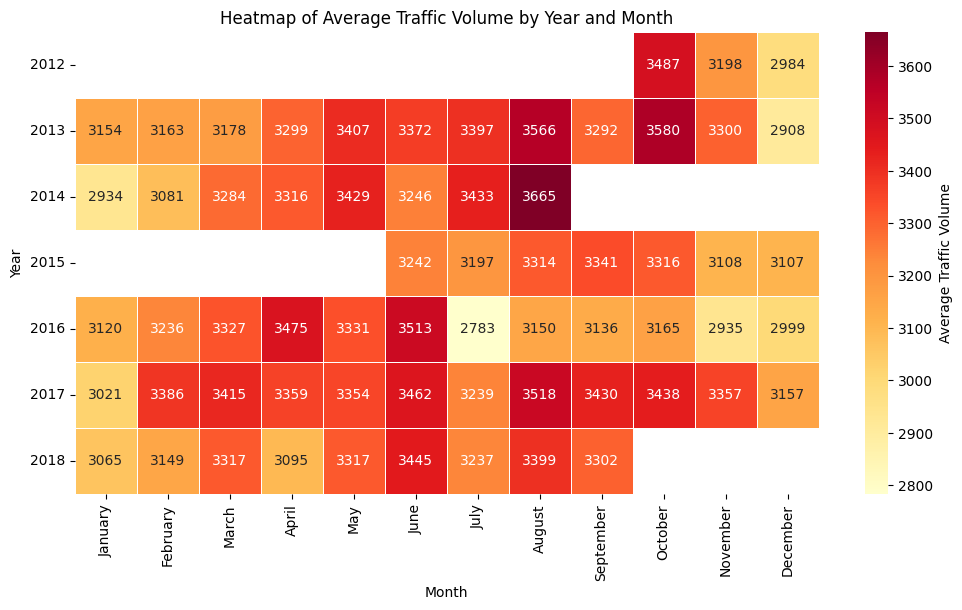

In [37]:
monthly_mean = df.groupby(['year','month_name'], observed=False)['traffic_volume'].mean().reset_index()
tv_month_by_year = monthly_mean.pivot(index='year',columns='month_name', values='traffic_volume').round(0)
plt.figure(figsize=(12, 6))
sns.heatmap(tv_month_by_year, annot=True, fmt='g', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Average Traffic Volume'})
plt.title('Heatmap of Average Traffic Volume by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.show()

In 2012, 2014 and 2015, some values are missing. In 2012, we have only last three months. In 2014, the last 4 months are missing, so the data is given from January to August. But in 2015, from January to May is missing.

The lowest traffic volume especially can be seen in winter, from December to February. The highest traffic can be seen in summer. In 2014, the highest traffic was observed in August at 3665. However, the lowest was in July of 2015 at 2783. 

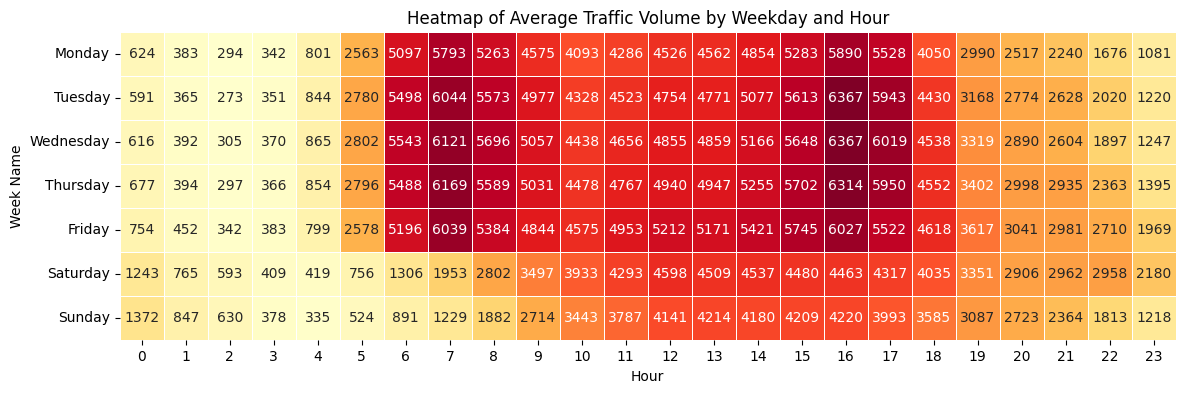

In [38]:
monthly_mean = df.groupby(['week_name','hour'], observed=False)['traffic_volume'].mean().reset_index()
tv_month_by_year = monthly_mean.pivot(index='week_name',columns='hour', values='traffic_volume').round(0)
plt.figure(figsize=(20, 4))
sns.heatmap(tv_month_by_year, square=True, annot=True, fmt='g', cmap='YlOrRd', cbar=False, linewidths=0.5, cbar_kws={'label': 'Average Traffic Volume'})
plt.title('Heatmap of Average Traffic Volume by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Week Name')
plt.yticks(rotation=0)
plt.show()

As we mentioned earlier, in working days, from Monday to Friday, from 6 am to 6 pm, it can be observed the highest traffic volume, especially at 7 am and 4 pm.

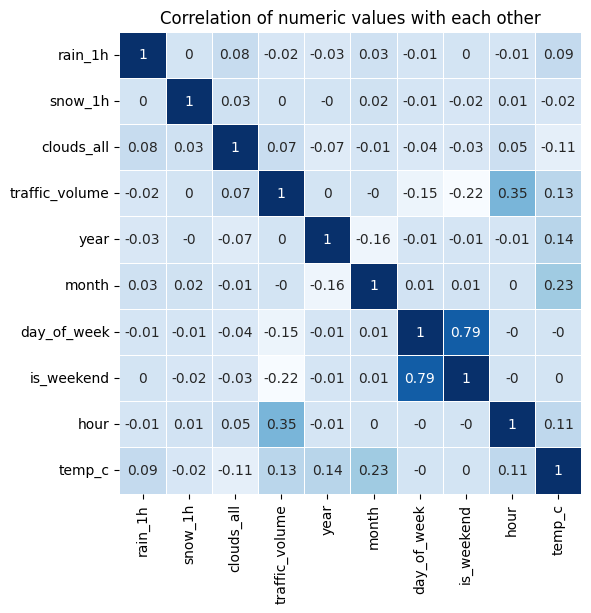

In [39]:
df_numeric = df.select_dtypes(include='number')
corr_matrix = df_numeric.corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(data=corr_matrix, square=True, linewidth=.5, annot=True, cbar=False, cmap='Blues')
plt.title("Correlation of numeric values with each other")
plt.show()

So, we can see that  there is no high correlation between target column and other features. Only hour and traffic has correlation at 0.35. but, this is weak. Also, we have negative correlation with is_weekend column. it suggests that in weekends, the traffic volume will be low. Negative correlation is also good, but also it is so weak. So, what can we conclude from this correlation matrix? We can conclude that linear models, such as LinearRegression, Lasso, Ridge and other algorithms can not work well with this dataset, so should consider Tree models.

In [40]:
correlation_with_target = df_numeric.corrwith(df['traffic_volume']).round(2)
correlation_with_target.sort_values(ascending=False)

traffic_volume    1.00
hour              0.35
temp_c            0.13
clouds_all        0.07
month            -0.00
snow_1h           0.00
year              0.00
rain_1h          -0.02
day_of_week      -0.15
is_weekend       -0.22
dtype: float64

Here, we see the correlation of features with target column

### ML Preprocessing

In [41]:
df.sample(3)

,holiday,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,month_name,day_of_week,week_name,is_weekend,hour,temp_c
33248,No Holiday,0.0,0.0,0.90,Rain,moderate rain,2017-05-01 09:00:00,4853,2017,5,May,0,Monday,0,9,3.5
8646,No Holiday,0.0,0.0,0.56,Clouds,broken clouds,2013-08-25 12:00:00,4851,2013,8,August,6,Sunday,1,12,28.3
33889,No Holiday,0.0,0.0,0.90,Drizzle,heavy intensity drizzle,2017-05-21 10:00:00,3629,2017,5,May,6,Sunday,1,10,9.6


In [42]:
# drop useless cols
cols_to_drop = ['date_time', 'year', 'month_name','week_name', 'weather_description'] 
# here we drop weather description, because we have main weather types, if we do OneHotEncoding for weather_description column, we have 33 extra columns
# Now, let's just work with weather_main column, if model does not work very well, then we consider this column also
df = df.drop(columns=cols_to_drop)

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_1h,48176.0,0.130388,1.003654,0.0,0.00,0.00,0.0,55.63
snow_1h,48176.0,0.000223,0.008170,0.0,0.00,0.00,0.0,0.51
clouds_all,48176.0,0.493752,0.390130,0.0,0.01,0.64,0.9,1.00
traffic_volume,48176.0,3259.973887,1986.847829,0.0,1194.00,3380.00,4933.0,7280.00
month,48176.0,6.506248,3.399930,1.0,4.00,7.00,9.0,12.00
day_of_week,48176.0,2.984515,2.005920,0.0,1.00,3.00,5.0,6.00
is_weekend,48176.0,0.284249,0.451061,0.0,0.00,0.00,1.0,1.00
hour,48176.0,11.398933,6.940488,0.0,5.00,11.00,17.0,23.00
temp_c,48176.0,8.115462,12.709707,-29.8,-1.00,9.30,18.7,36.90


Before we move on, let's check the dataset one more time by seeing small analysis using describe() method

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
X = df.drop(columns=['traffic_volume']) # this is features
y = df['traffic_volume'] # this is target column

In [46]:
# divide into train and test columns
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [47]:
X_train.head(5)

,holiday,rain_1h,snow_1h,clouds_all,weather_main,month,day_of_week,is_weekend,hour,temp_c
8090,No Holiday,0.0,0.00,0.64,Mist,7,2,0,23,18.1
10157,No Holiday,0.0,0.00,0.64,Clouds,11,2,0,0,-12.0
33824,No Holiday,0.0,0.00,0.90,Rain,5,5,1,8,7.6
20261,No Holiday,0.0,0.00,0.01,Clear,12,0,0,12,-7.1
20507,No Holiday,0.0,0.25,0.90,Snow,1,4,0,13,0.7


In [48]:
# dividing the cols to categorical and numerical so that we can preprocess them easily
cat_cols = ['holiday', 'weather_main']
passthrough_columns = [col for col in X.columns if col not in cat_cols]

# creating processor
processor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('pass', 'passthrough', passthrough_columns)
])

In [49]:
# prepare the data fully for machine learning
X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

### Create Machine Learning models

In [50]:
# here we create a function to evaluate the model easily every time
def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{'='*50}")
    print(f"{model_name.upper()} Performance")
    print(f"{'='*50}")
    print(f"RMSE      :{rmse:.5f}")
    print(f"MSE       :{mse:.5f}")
    print(f"MAE       :{mae:.5f}")
    print(f"R² Score  : {r2:.5f}")
    print(f"{'='*50}\n")

    return {
        'Model':model_name,
        'RMSE':round(rmse,5),
        'MSE':round(mse,5),
        'MAE':round(mae,5),
        'R2':round(r2,5)
    }

### First, we try Tree models as they work best in this dataset

In [51]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_processed, y_train)
y_pred_xgb = xgb_model.predict(X_test_processed)

report_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost Regressor")
report_xgb


XGBOOST REGRESSOR Performance
RMSE      :415.46871
MSE       :172614.25000
MAE       :246.50514
R² Score  : 0.95618



{'Model': 'XGBoost Regressor',
 'RMSE': np.float64(415.46871),
 'MSE': 172614.25,
 'MAE': 246.50514,
 'R2': 0.95618}

In [52]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=100
)
# fit the model
catboost_model.fit(X_train_processed, y_train)
# predict
y_pred_catboost = catboost_model.predict(X_test_processed)

report_catboost = evaluate_model(y_test, y_pred_catboost, "CatBoost Regressor")
report_catboost

0:	learn: 1902.8218280	total: 143ms	remaining: 2m 23s
100:	learn: 517.4546646	total: 505ms	remaining: 4.5s
200:	learn: 481.4809874	total: 894ms	remaining: 3.55s
300:	learn: 466.8420655	total: 1.24s	remaining: 2.87s
400:	learn: 456.8601022	total: 1.57s	remaining: 2.35s
500:	learn: 449.5046632	total: 1.9s	remaining: 1.89s
600:	learn: 442.5622563	total: 2.23s	remaining: 1.48s
700:	learn: 436.9616426	total: 2.56s	remaining: 1.09s
800:	learn: 431.7576348	total: 2.89s	remaining: 718ms
900:	learn: 426.7053843	total: 3.21s	remaining: 353ms
999:	learn: 423.0786354	total: 3.54s	remaining: 0us

CATBOOST REGRESSOR Performance
RMSE      :427.13951
MSE       :182448.16324
MAE       :253.36908
R² Score  : 0.95368



{'Model': 'CatBoost Regressor',
 'RMSE': np.float64(427.13951),
 'MSE': 182448.16324,
 'MAE': 253.36908,
 'R2': 0.95368}

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=1000,       
    max_depth=20,            
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',    
    random_state=42,
    n_jobs=-1,               
    warm_start=False
)

# Fit the model
rf_model.fit(X_train_processed, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluate exactly like you did with CatBoost
report_rf = evaluate_model(y_test, y_pred_rf, "RandomForest Regressor")
report_rf


RANDOMFOREST REGRESSOR Performance
RMSE      :562.34720
MSE       :316234.36785
MAE       :408.85435
R² Score  : 0.91971



{'Model': 'RandomForest Regressor',
 'RMSE': np.float64(562.3472),
 'MSE': 316234.36785,
 'MAE': 408.85435,
 'R2': 0.91971}

### Let's use Linear Models

In [54]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_processed,y_train)
y_pred_linear = linear_model.predict(X_test_processed)
report_linear = evaluate_model(y_test,y_pred_linear,"Linear Regression")
report_linear


LINEAR REGRESSION Performance
RMSE      :1796.14197
MSE       :3226125.98173
MAE       :1573.04362
R² Score  : 0.18093



{'Model': 'Linear Regression',
 'RMSE': np.float64(1796.14197),
 'MSE': 3226125.98173,
 'MAE': 1573.04362,
 'R2': 0.18093}

In [55]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001, random_state=42)  
lasso_model.fit(X_train_processed, y_train)
y_pred_lasso = lasso_model.predict(X_test_processed)

report_lasso = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


LASSO REGRESSION Performance
RMSE      :1796.13509
MSE       :3226101.25011
MAE       :1573.03194
R² Score  : 0.18094



#### Here we can see that linear models worked very bad

### Let's work on improving the dataset using RandomizedSearchCV

In [56]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define model
cat = CatBoostRegressor(random_seed=42, verbose=0)  # Silent during search

# Param distribution
param_dist = {
    'iterations': randint(500, 1500),      # 500-1500
    'learning_rate': uniform(0.01, 0.1),   # 0.01-0.11
    'depth': randint(4, 10),               # 4-10
    'l2_leaf_reg': uniform(1, 10),         # Regularization: 1-10
    'border_count': randint(32, 255)       # Borders: 32-255
}

# TimeSeriesSplit for 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Randomized search
random_search_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=20,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit
random_search_cat.fit(X_train_processed, y_train)

# Best params and score
print("Best Parameters:", random_search_cat.best_params_)
print("Best CV RMSE:", -random_search_cat.best_score_)

# Test with best model
best_cat = random_search_cat.best_estimator_
y_pred_cat_opt = best_cat.predict(X_test_processed)
report_cat_opt = evaluate_model(y_test, y_pred_cat_opt, "Tuned CatBoost")
report_cat_opt

# Per-fold CV results
cv_results_cat_opt = pd.DataFrame(random_search_cat.cv_results_)
print("Mean RMSE across folds:", -cv_results_cat_opt['mean_test_score'].mean())
print("Std RMSE across folds:", cv_results_cat_opt['std_test_score'].mean())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'border_count': 45, 'depth': 9, 'iterations': 1226, 'l2_leaf_reg': np.float64(6.208342600258237), 'learning_rate': np.float64(0.10611720243493492)}
Best CV RMSE: 441.19901867637253

TUNED CATBOOST Performance
RMSE      :392.53820
MSE       :154086.24091
MAE       :233.22753
R² Score  : 0.96088

Mean RMSE across folds: 463.3771478782918
Std RMSE across folds: 15.120125983943007


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Define model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Param distribution for random search
param_dist = {
    'n_estimators': randint(200, 1000),  # Trees: 200-1000
    'max_depth': [None] + list(randint(10, 30).rvs(5)),  # Depth: None or 10-30
    'min_samples_split': randint(2, 10),  # Min split: 2-10
    'min_samples_leaf': randint(1, 4),    # Min leaf: 1-4
    'max_features': uniform(0.3, 0.7)     # Features per split: 30-100%
}

# TimeSeriesSplit for 5 folds
tscv = TimeSeriesSplit(n_splits=5)

# Randomized search
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 random combos
    cv=tscv,    # 5-fold time-series CV
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE (or 'r2' for R2)
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on processed train data
random_search_rf.fit(X_train_processed, y_train)

# Best params and score
print("Best Parameters:", random_search_rf.best_params_)
print("Best CV RMSE:", -random_search_rf.best_score_)  # Negative because of scoring

# Evaluate on test set with best model
best_rf = random_search_rf.best_estimator_
y_pred_rf_opt = best_rf.predict(X_test_processed)

# Your evaluate function (assuming it prints RMSE, MAE, R2)
report_rf_opt = evaluate_model(y_test, y_pred_rf_opt, "Tuned RandomForest")
report_rf_opt

# Per-fold CV results (mean/std across 5 folds)
cv_results_rf_opt = pd.DataFrame(random_search_rf.cv_results_)
print("Mean RMSE across folds:", -cv_results_rf_opt['mean_test_score'].mean())
print("Std RMSE across folds:", cv_results_rf_opt['std_test_score'].mean())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': None, 'max_features': np.float64(0.48114598712001183), 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 589}
Best CV RMSE: 458.35990546686133

TUNED RANDOMFOREST Performance
RMSE      :419.85656
MSE       :176279.53388
MAE       :243.82942
R² Score  : 0.95525

Mean RMSE across folds: 471.3952561150494
Std RMSE across folds: 22.9156077493661


In [58]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import randint, uniform
import pandas as pd

# Base model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',       # Fast histogram-based algorithm
    random_state=42
)

# Hyperparameter search space
param_dist_xgb = {
    'n_estimators': randint(300, 1200),       # number of boosting rounds
    'learning_rate': uniform(0.01, 0.2),      # step size shrinkage
    'max_depth': randint(3, 12),              # tree depth
    'subsample': uniform(0.5, 0.5),           # 0.5–1.0
    'colsample_bytree': uniform(0.5, 0.5),    # 0.5–1.0
    'gamma': uniform(0, 5),                   # minimum loss reduction
    'min_child_weight': randint(1, 10),       # minimum sum of instance weight
    'reg_alpha': uniform(0, 2),               # L1 regularization
    'reg_lambda': uniform(0, 2)               # L2 regularization
}

# TimeSeriesSplit (5 folds)
tscv = TimeSeriesSplit(n_splits=5)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=25,                                # Number of random combinations
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on processed train data
random_search_xgb.fit(X_train_processed, y_train)

# Print best parameters
print("Best XGBoost Parameters:", random_search_xgb.best_params_)
print("Best CV RMSE:", -random_search_xgb.best_score_)

# Evaluate best model on test data
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb_opt = best_xgb.predict(X_test_processed)

report_xgb_opt = evaluate_model(y_test, y_pred_xgb_opt, "Tuned XGBoost")
report_xgb_opt

# Optional: CV results
cv_results_xgb = pd.DataFrame(random_search_xgb.cv_results_)
print("Mean CV RMSE:", -cv_results_xgb['mean_test_score'].mean())
print("Std CV RMSE:", cv_results_xgb['std_test_score'].mean())


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best XGBoost Parameters: {'colsample_bytree': np.float64(0.9357302950938589), 'gamma': np.float64(4.018360384495573), 'learning_rate': np.float64(0.04731401177720717), 'max_depth': 9, 'min_child_weight': 9, 'n_estimators': 530, 'reg_alpha': np.float64(1.813656883091508), 'reg_lambda': np.float64(0.5442644987692706), 'subsample': np.float64(0.8238450602706812)}
Best CV RMSE: 443.5698974609375

TUNED XGBOOST Performance
RMSE      :392.30855
MSE       :153906.00000
MAE       :232.47832
R² Score  : 0.96093

Mean CV RMSE: 467.7514655761718
Std CV RMSE: 25.083753367289745


In [59]:
reports = [
    report_xgb,
    report_catboost,
    report_rf,
    report_linear,
    report_lasso,
    report_cat_opt,
    report_rf_opt,
    report_xgb_opt
]
results_df = pd.DataFrame(reports)
results_df['MSE'] = results_df['MSE'].round(2)
results_df.sort_values(by='R2', ascending=False)

,Model,RMSE,MSE,MAE,R2
7,Tuned XGBoost,392.30855,153906.00,232.47832,0.96093
5,Tuned CatBoost,392.53820,154086.24,233.22753,0.96088
0,XGBoost Regressor,415.46871,172614.25,246.50514,0.95618
6,Tuned RandomForest,419.85656,176279.53,243.82942,0.95525
1,CatBoost Regressor,427.13951,182448.16,253.36908,0.95368
2,RandomForest Regressor,562.34720,316234.37,408.85435,0.91971
4,Lasso Regression,1796.13509,3226101.25,1573.03194,0.18094
3,Linear Regression,1796.14197,3226125.98,1573.04362,0.18093


In [60]:
import joblib
joblib.dump({
    'preprocessor':processor,
    'model':random_search_xgb
},'traffic_model.pkl')
print("Model saved as traffic_model.pkl")

Model saved as traffic_model.pkl


In [77]:
import pkg_resources
import sys

# List of packages used in the project
packages = [
    'streamlit',
    'pandas',
    'numpy',
    'scikit-learn',
    'joblib',
    'catboost',
    'xgboost', 
    'matplotlib',
    'seaborn'
]

# Generate clean requirements.txt
with open('requirements.txt', 'w') as f:
    for package in packages:
        try:
            version = pkg_resources.get_distribution(package).version
            f.write(f"{package}=={version}\n")
        except pkg_resources.DistributionNotFound:
            f.write(f"{package}  # not installed\n")

print("Clean requirements.txt created!")

Clean requirements.txt created!
